In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
nba = "newadvancedstats.csv"

In [5]:
df_nba = pd.read_csv('newadvancedstats.csv')

In [9]:
nba = pd.read_csv('newadvancedstats.csv')
nba

,Rk,Player,Pos,MP,PER,TSx,3PAr,FTr,ORBx,DRBx,...,RA_TOV__Def_Rank,RA_TOV__Off,RA_TOV__Off_Rank,RAPM,RAPM_Rank,RAPM__Def,RAPM__Def_Rank,RAPM__Off,RAPM__Off_Rank,PIPM
0,1,Aaron Gordon,PF,1914,14.8,0.511,0.311,0.280,5.6,19.6,...,505,0.41,50,-0.22,306,-0.64,424,0.43,129,-0.12
1,2,Aaron Holiday,PG,1368,11.7,0.517,0.409,0.145,1.7,8.9,...,355,0.61,17,0.99,82,0.17,199,0.82,69,-0.48
2,3,Abdel Nader,SF,756,11.2,0.580,0.477,0.282,2.1,10.8,...,475,-0.17,377,-1.63,483,0.12,219,-1.75,506,-3.17
3,4,Admiral Schofield,SF,293,6.8,0.514,0.627,0.173,2.2,10.9,...,127,0.07,191,-0.42,351,-0.26,349,-0.17,312,-1.90
4,5,Al Horford,C,1848,15.6,0.526,0.404,0.112,5.5,19.1,...,151,-0.16,370,1.04,74,0.77,69,0.27,159,1.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,Willie Cauley-Stein,C,1097,17.0,0.589,0.003,0.219,8.0,23.2,...,54,0.38,62,-0.25,315,1.29,27,-1.54,501,0.26
389,390,Willy Hernangómez,C,375,19.2,0.576,0.158,0.424,12.1,27.5,...,340,-0.20,390,-0.21,301,0.42,135,-0.63,413,0.56
390,391,Wilson Chandler,SF,734,7.4,0.531,0.661,0.126,1.6,18.3,...,440,-0.44,476,-1.56,480,-0.63,422,-0.93,459,-2.55
391,392,Yogi Ferrell,PG,484,10.7,0.499,0.408,0.219,1.4,10.0,...,26,0.09,180,-0.33,338,0.45,127,-0.78,434,-1.58


In [7]:
nba.shape

(398, 27)

In [12]:
X = nba.drop(['Player', 'Pos'], axis=1)
y = nba['Pos']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.35370233184736344


In [15]:
LDA = LinearDiscriminantAnalysis(n_components=2, shrinkage='auto', solver='eigen')

In [16]:
LDA_df = LDA.fit(X_scaled,y).transform(X_scaled)

C:\Users\Anthony Nguyen\Anaconda3\envs\PythonData\lib\site-packages\sklearn\covariance\_shrunk_covariance.py:205: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\Users\Anthony Nguyen\Anaconda3\envs\PythonData\lib\site-packages\sklearn\covariance\_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\Users\Anthony Nguyen\Anaconda3\envs\PythonData\lib\site-packages\sklearn\covariance\_shrunk_covariance.py:205: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\Users\Anthony Nguyen\Anaconda3\envs\PythonData\lib\site-packages\sklearn\covariance\_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


In [17]:
LDA.score(X_scaled,y)

0.7022900763358778

In [18]:
kmeans_model = KMeans(n_clusters=9, random_state=1)
kmeans_model.fit(LDA_df)
new_model = kmeans_model.labels_
new_model

array([6, 1, 6, 5, 6, 7, 7, 8, 0, 5, 7, 3, 7, 5, 2, 2, 0, 6, 2, 5, 5, 8,
       5, 4, 8, 3, 6, 7, 0, 1, 1, 2, 7, 7, 1, 6, 1, 6, 6, 5, 5, 8, 5, 0,
       1, 0, 5, 7, 0, 8, 2, 4, 7, 4, 3, 2, 7, 3, 5, 7, 8, 5, 1, 7, 8, 8,
       1, 7, 5, 4, 8, 8, 0, 5, 7, 0, 6, 6, 1, 0, 4, 8, 7, 5, 3, 1, 7, 1,
       7, 6, 1, 4, 7, 0, 3, 0, 4, 1, 7, 1, 4, 2, 5, 4, 6, 8, 7, 7, 0, 0,
       4, 0, 7, 3, 6, 7, 8, 1, 4, 1, 1, 3, 1, 5, 0, 2, 5, 1, 5, 6, 1, 1,
       5, 7, 0, 5, 1, 5, 1, 5, 8, 0, 2, 1, 6, 2, 0, 7, 0, 0, 8, 3, 6, 6,
       8, 1, 1, 3, 4, 0, 7, 0, 8, 6, 7, 8, 4, 1, 0, 1, 6, 0, 0, 6, 3, 7,
       3, 0, 8, 0, 0, 0, 4, 0, 0, 7, 7, 1, 4, 5, 0, 1, 8, 2, 8, 3, 6, 8,
       7, 4, 7, 7, 0, 0, 7, 1, 6, 6, 0, 0, 0, 8, 1, 0, 0, 6, 0, 7, 7, 0,
       0, 5, 7, 0, 2, 7, 6, 7, 1, 2, 1, 6, 5, 0, 1, 3, 2, 5, 5, 6, 0, 4,
       0, 4, 1, 5, 4, 7, 6, 4, 5, 5, 7, 6, 0, 0, 1, 0, 4, 6, 7, 8, 0, 8,
       7, 0, 4, 0, 6, 2, 1, 0, 2, 0, 1, 6, 0, 0, 3, 3, 1, 6, 8, 2, 0, 6,
       6, 8, 7, 7, 6, 8, 8, 8, 7, 6, 6, 6, 0, 7, 7,

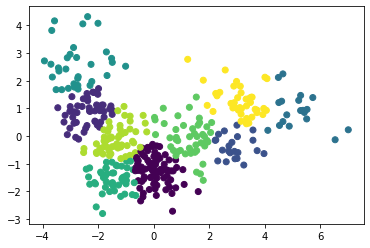

In [19]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(LDA_df)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=new_model)
plt.show()

In [20]:
plot_columns

array([[ 8.20195293e-01, -4.70944388e-02],
       [-2.32121722e+00,  1.02540633e+00],
       [ 5.89059583e-01, -6.01410168e-02],
       [-1.09833177e+00, -1.62420019e+00],
       [ 1.29070618e+00,  1.04187651e+00],
       [-1.40256582e+00, -3.62613064e-01],
       [-2.52174105e+00, -5.91939597e-01],
       [ 3.97246612e+00,  1.00211018e+00],
       [-4.80356354e-02, -1.22479540e+00],
       [-9.66279043e-01, -1.41576692e+00],
       [-8.45249477e-01,  7.24140484e-01],
       [ 4.80234663e+00,  7.69900858e-01],
       [-1.18525170e+00, -3.90629423e-01],
       [-1.70846816e+00, -1.64585221e+00],
       [ 2.48071479e+00, -5.05168873e-01],
       [ 2.55194495e+00,  1.89166438e-01],
       [-8.45134971e-02, -1.47162451e+00],
       [ 1.60535799e+00,  3.97295146e-01],
       [ 2.82446740e+00, -2.22800267e-01],
       [-1.52762391e+00, -1.71238258e+00],
       [-2.34314145e+00, -1.47483940e+00],
       [ 2.38795252e+00,  1.58315053e+00],
       [-1.18594453e+00, -2.17825523e+00],
       [-1.

In [23]:
name1 = pd.DataFrame(new_model)
name1 = name1.rename(columns={0: "clusters"})
name2 = name1['clusters']
name2

0      6
1      1
2      6
3      5
4      6
      ..
388    8
389    8
390    0
391    1
392    7
Name: clusters, Length: 393, dtype: int32

In [25]:
nba['clusters'] = name2
nba

,Rk,Player,Pos,MP,PER,TSx,3PAr,FTr,ORBx,DRBx,...,RA_TOV__Off,RA_TOV__Off_Rank,RAPM,RAPM_Rank,RAPM__Def,RAPM__Def_Rank,RAPM__Off,RAPM__Off_Rank,PIPM,clusters
0,1,Aaron Gordon,PF,1914,14.8,0.511,0.311,0.280,5.6,19.6,...,0.41,50,-0.22,306,-0.64,424,0.43,129,-0.12,6
1,2,Aaron Holiday,PG,1368,11.7,0.517,0.409,0.145,1.7,8.9,...,0.61,17,0.99,82,0.17,199,0.82,69,-0.48,1
2,3,Abdel Nader,SF,756,11.2,0.580,0.477,0.282,2.1,10.8,...,-0.17,377,-1.63,483,0.12,219,-1.75,506,-3.17,6
3,4,Admiral Schofield,SF,293,6.8,0.514,0.627,0.173,2.2,10.9,...,0.07,191,-0.42,351,-0.26,349,-0.17,312,-1.90,5
4,5,Al Horford,C,1848,15.6,0.526,0.404,0.112,5.5,19.1,...,-0.16,370,1.04,74,0.77,69,0.27,159,1.84,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,Willie Cauley-Stein,C,1097,17.0,0.589,0.003,0.219,8.0,23.2,...,0.38,62,-0.25,315,1.29,27,-1.54,501,0.26,8
389,390,Willy Hernangómez,C,375,19.2,0.576,0.158,0.424,12.1,27.5,...,-0.20,390,-0.21,301,0.42,135,-0.63,413,0.56,8
390,391,Wilson Chandler,SF,734,7.4,0.531,0.661,0.126,1.6,18.3,...,-0.44,476,-1.56,480,-0.63,422,-0.93,459,-2.55,0
391,392,Yogi Ferrell,PG,484,10.7,0.499,0.408,0.219,1.4,10.0,...,0.09,180,-0.33,338,0.45,127,-0.78,434,-1.58,1


In [ ]:
name3 = pd.DataFrame(plot_columns)
name3 = name3.rename(columns={0: "clusters"})
name4 = name3['clusters']
name4

In [28]:
nba.to_csv("clean-2020-real-advanced-stats.csv", index=False, header=True)